In this notebook I create the figures for the fluxtubestability paper.

# Fig. 1 - Theory Summary

In [2]:
import sys
sys.path.append('..')

import sympy as sp
sp.init_printing()

import numpy as np
from scipy.special import kv, kvp

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

/home/jensv/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
from analytic_condition import conditions

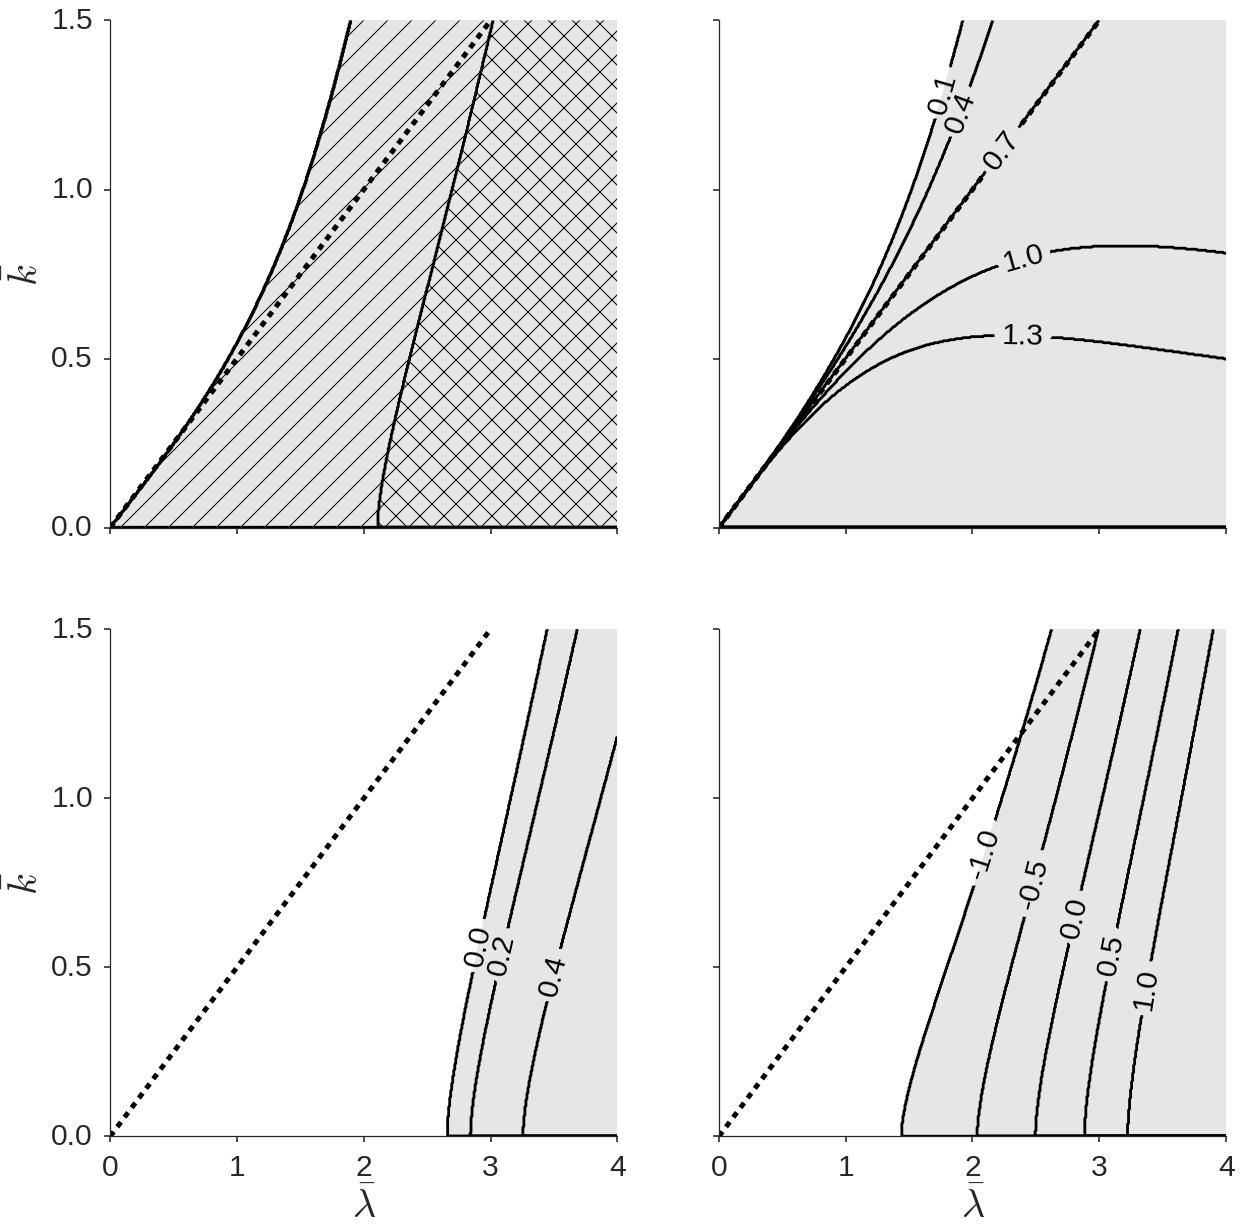

In [72]:
fig, axes = plt.subplots(2, 2,
                         figsize=(20,20),
                         sharex=True, 
                         sharey=True)

example_ax = axes[0][0]
kink_ax = axes[0][1]
sausage_ax = axes[1][0]
delta_ax = axes[1][1]

lambda_bar = np.linspace(0, 4., 500)
k_bar = np.linspace(0, 1.5, 500)
mesh = np.meshgrid(lambda_bar, k_bar)
lambda_bar_mesh, k_bar_mesh = mesh[0], mesh[1]

## Example Plot ##
##################

d_w_sausage = conditions(k_bar_mesh,
                         lambda_bar_mesh,
                         epsilon=0.1,
                         m=0,
                         delta=0.1)
d_w_kink = conditions(k_bar_mesh,
                      lambda_bar_mesh,
                      epsilon=0.1,
                      m=1,
                      delta=0.1)

stability_sausage = d_w_sausage < 0
stability_kink = d_w_kink < 0
stability = stability_kink.astype(float)
stability[stability_sausage] = 2


cmap = colors.ListedColormap(['1.0',
                              '0.9',
                              '0.9'])

example_ax.contourf(lambda_bar_mesh, k_bar_mesh, stability, cmap=cmap,
                    levels=[0., 0.5, 1.5, 2.], hatches=[None, '/', 'x'])
example_ax.contour(lambda_bar_mesh, k_bar_mesh, stability, 
                   levels=[0., 0.5, 1.5, 2.], colors='black')
example_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)
example_ax.set_ylabel(r'$\bar{k}$', fontsize=40)
plt.setp(example_ax.get_yticklabels(), fontsize=30)
example_ax.set_yticks(np.arange(0., 2.0, 0.5))

## Kink Plot ##
###############

delta = 0.0
stability = np.zeros(lambda_bar_mesh.shape) - 0.2
for i, epsilon in enumerate(np.arange(0.1, 1.9, 0.3)):

    d_w_kink = conditions(k_bar_mesh,
                          lambda_bar_mesh,
                          epsilon=epsilon,
                          m=1,
                          delta=delta)

    stability_epsilon = d_w_kink < 0 
    stability[stability_epsilon] = epsilon

levels = np.arange(0.1, 1.9, 0.3)
contour = kink_ax.contourf(lambda_bar_mesh, 
                           k_bar_mesh, 
                           stability,
                           levels=levels)
contour.cmap.set_over('0.9')
contour.cmap.set_under('white')
contour.set_clim(-0.1, 0.)
contour_lines = kink_ax.contour(lambda_bar_mesh, 
                               k_bar_mesh, 
                               stability,
                               levels=levels, 
                               colors='black')
kink_ax.clabel(contour_lines, fontsize=30, 
                              manual=([1.6, 1.3], 
                                      [2.1, 1.2], 
                                      [2.3, 1.1],
                                      [2.4, 0.8],
                                      [2.4, 0.5]),
                               fmt='%.1f')
for line in contour_lines.collections:
    line.set_linestyle('solid')
    
line_x = np.linspace(0, 3, 50)
line_y = np.linspace(0, 1.5, 50)
    
line_y_masked = np.ma.masked_inside(line_y, 1.05, 1.18)    
    
kink_ax.plot(line_x, line_y_masked, '--', c='black', lw=5)

## Sausage Plot ##
##################

delta = 0.7
stability = np.zeros(lambda_bar_mesh.shape) - 0.2
for i, epsilon in enumerate(np.arange(0, 1.0, 0.2)):

    d_w_sausage = conditions(k_bar_mesh,
                            lambda_bar_mesh,
                            epsilon=epsilon,
                            m=0,
                            delta=delta)

    stability_epsilon = d_w_sausage < 0 
    stability[stability_epsilon] = epsilon

levels = np.arange(0., 1., 0.2)
contour = sausage_ax.contourf(lambda_bar_mesh, 
                              k_bar_mesh, 
                              stability,
                              levels=levels)
contour.cmap.set_over('0.9')
contour.cmap.set_under('white')
contour.set_clim(-0.2, -0.1)

contour_lines = sausage_ax.contour(lambda_bar_mesh, 
                                   k_bar_mesh, 
                                   stability,
                                   levels=levels, 
                                   colors='black')
for line in contour_lines.collections:
    line.set_linestyle('solid')
    
    
sausage_ax.clabel(contour_lines, fontsize=30, 
                              manual=([2.5, 0.6], 
                                      [3., 0.55],
                                      [3.3, 0.5]),
                               fmt='%.1f')
    
sausage_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)
sausage_ax.set_xlabel(r'$\bar{\lambda}$', fontsize=40)
plt.setp(sausage_ax.get_xticklabels(), fontsize=30)
sausage_ax.set_xticks(np.arange(0., 5, 1.))

sausage_ax.set_ylabel(r'$\bar{k}$', fontsize=40)
plt.setp(sausage_ax.get_yticklabels(), fontsize=30)
sausage_ax.set_yticks(np.arange(0., 2.0, 0.5))

### delta variance ###
######################

epsilon = 0.2
stability = np.zeros(lambda_bar_mesh.shape) - 1.2
for i, delta in enumerate(np.arange(-1.0, 1.6, 0.5)):

    d_w_delta = conditions(k_bar_mesh,
                           lambda_bar_mesh,
                           epsilon=epsilon,
                           m=0,
                           delta=delta)

    stability_delta = d_w_delta < 0 
    stability[stability_delta] = delta

levels = np.arange(-1.0, 1.6, 0.5)
contour = delta_ax.contourf(lambda_bar_mesh, 
                            k_bar_mesh, 
                            stability,
                            levels=levels,
                            extend='both')
levels = np.arange(-1.0, 1.6, 0.5)
contour_lines = delta_ax.contour(lambda_bar_mesh, 
                                 k_bar_mesh, 
                                 stability,
                                 levels=levels, 
                                 colors='black')
contour.cmap.set_over('0.9')
contour.cmap.set_under('white')
contour.set_clim(-1.3, -1.0)

for line in contour_lines.collections:
    line.set_linestyle('solid')
    
sausage_ax.clabel(contour_lines, 
                  fontsize=30, 
                  manual=([2., 0.85],
                          [2.4, 0.75],
                          [2.8, 0.65],
                          [3.0, 0.55],
                          [3.3, 0.45]),
                          fmt='%.1f')
    
delta_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)
delta_ax.set_xlabel(r'$\bar{\lambda}$', fontsize=40)
plt.setp(delta_ax.get_xticklabels(), fontsize=30)
delta_ax.set_xticks(np.arange(0., 5, 1.))
sns.despine(fig)
fig.savefig('../../figures/figure_1.png')

# Fig. 2 - Numerics Profile

# Fig. 3 - Numerics Summary